 ### Mental Health in Tech Workplace - EDA 

 
 The goal of this dataset and notebook is to explore the influences of mental health of people who work in tech, and to be able to predict who could use intervention and help

Dataset from Kaggle: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data
- downloaded in a CSV file named survey.csv
Original dataset from https://osmihelp.org/ 

Questions Worth Exploring:
How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?


My objective through this project is to be able to predict how different work environment, benefits and work wellness programs effect an employees percieved difficulty with discussing mental health issues. These insights could help Human Resources departments with implementing better resources and employee outreach based on the company enviornment and culture for a more welcoming and inclusive for those with mental health difficulties. 

I needed some more data to supplement the survey answers. Adding __ and ____ and ____ boosted the 

### Import Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve

Category Descriptions:

State: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

Does your employer provide mental health benefits is the target variable. A lot of people who don't seek treatment or feel like they can talk about mental health is because their employer does not provide mental health benefits. People who have beneifts are willing to seek for help. 
Because benefits are more willing to pay and allow people to look for help. 

### Read Dataset

In [155]:
df = pd.read_csv('Downloads/survey.csv') #this file is already in Users/christineyao...  ask TAs how they want to see the user path

In [156]:
#rows and columns
print(df.shape)

(1259, 27)


- We have a total of 1259 rows and 27 columns in the data set

In [157]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


At first glance, the timestamp is just the time the responant subitted their survey, which is not really important. The comment column is also not that important and hard to analyze and to save time I'll drop that column  and timestamp later on. The state column describes states of those who reside in the US. For those not from the US, it is NaN. We could drop the state column so that we can use all the data from the country column. 

- Ordinal/Categorical features
    - work_interfere
    - no_employees
    - leave
    - coworkers

- Categorical Yes/No/Maybe
    - Family History
    - Treatment
    - Mental Health Consequence
    - Physical Health Consequence
    - Supervisor
    - Mental Health Interview
    - Physical Health Interview
    - Mental vs. Physical
    - Obs Consequence

- Numerical Discreet Features
    - Age

In [158]:
#datatypes of all the columns
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

Every single feature is a string object except for age. 

### Preprocessing and Cleaning Dataset

In [222]:
df.isnull().sum() 

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

There are a lot of null values in state, which makes sense since not all countries in the country category is the United States. However, a majority of the values from the survey come from the United States. Many missing values in comments, which is hard to analyze so I might drop this colummn. There are alkso missing values in slef employed and work_interfere

Dropping Unecessary Columns

In [169]:
#Checking to see what values are nan in work interfere and self employed
df['self_employed'].unique() #[nan, 'Yes', 'No']
df['work_interfere'].unique() #['Often', 'Rarely', 'Never', 'Sometimes', nan]

#dropping unecessary columns due to 
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)

df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [224]:
df.shape

(1251, 24)

The new dataframe has 1251 rows and 24 columns

### EDA on the dataset

In [223]:
print(df['Gender'].describe())

count     1251
unique       3
top       Male
freq       986
Name: Gender, dtype: object


Without cleaning the data, male is the most frequent answer in the gender category, which makes sense given that tech is a male dominated field. We need to change this column so that the choices are only male, female and other. 
Cleaning up all of the mispellings, trans, queer, fluid and "ish" categories as well as f and m short hand, and replacing them with either Male, Female or Other. 

In [171]:
df['Gender'].unique() #these are all the unique features in the gender column.

array(['Female', 'Male', 'Other'], dtype=object)

Sort them into either 
- Male, or cis-male. This is someone who was born as a male and indentifies that way
- Female or cis-female. This is someone who was born as female and identifies that way
- Other, gender queer, fluid, androgynous, non-binary, trans categories

In [163]:
df["Gender"].replace(['array of values and mispellings'], 'replaced value', inplace = True)

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means', 
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/4028062353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace(['array of values and mispellings'], 'replaced value', inplace = True)


Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64

Age

In [164]:
#cleaning the age column
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [165]:
#drop row where age = 99999999, a negative integer, 329, and less than 18 or greater than 75

df.drop(df[df['Age'] < 18].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

There are a wide range of ages, but it's safe to say that we can assume those that are in the workforce are above age 18 and less than around 80 years old. We can assume that the people who submitted age outliers probably just put in a random number because they feel like exposing their real ages 

In [172]:
print(df['Age'].describe()) #after dropping rows with outliers

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


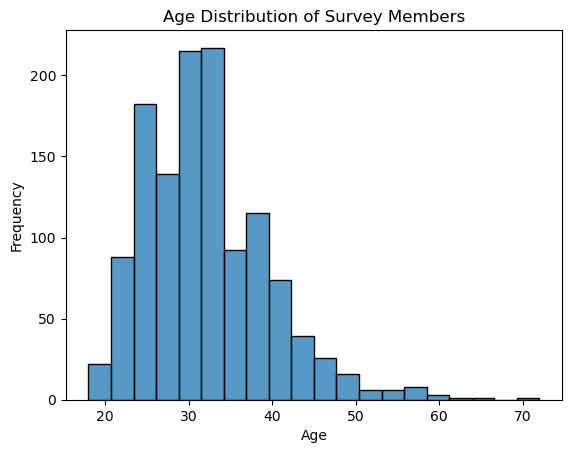

In [220]:

sns.histplot(data=df, x='Age', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survey Members')
plt.show()


In [ ]:
#Age and gender effect on care_options, coworkers and supervisors

import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc




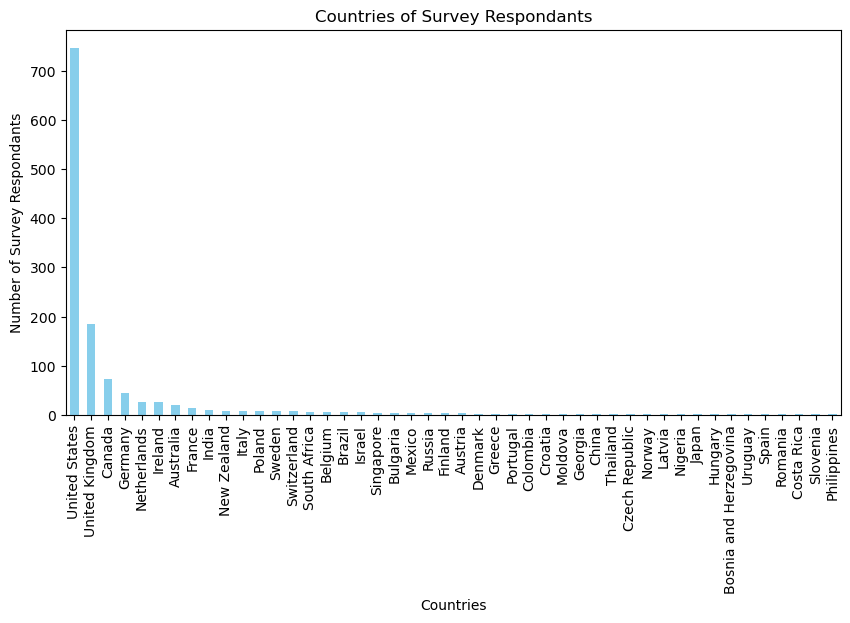

Number of countries
46


In [174]:
#Respondants in different countries
# separate Country column by unique values and bin everything
grouped_data = df['Country'].value_counts()
#histogram is for numerical values, and bar plot is for categorical

# Create a bar chart
plt.figure(figsize=(10, 5))  # Adjust the width (12) as needed
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Countries of Survey Respondants')
plt.xlabel('Countries')
plt.ylabel('Number of Survey Respondants')
plt.show()
print('Number of countries')
print(grouped_data.size)

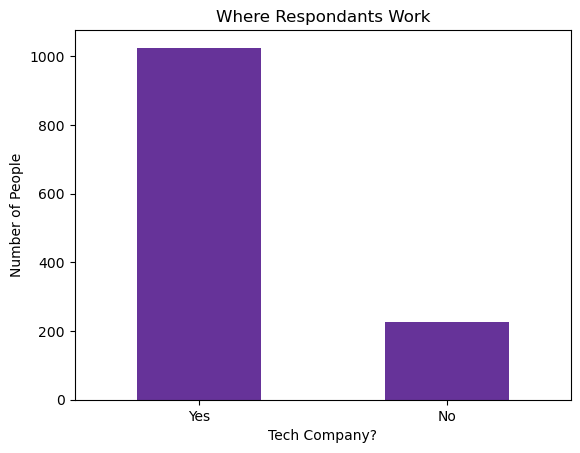

In [199]:
tech = df['tech_company'].value_counts()

tech.plot(kind='bar', color = 'rebeccapurple')
plt.title('Where Respondants Work')
plt.xticks(rotation=360) 
plt.xlabel('Tech Company?')
plt.ylabel('Number of People')
plt.show()

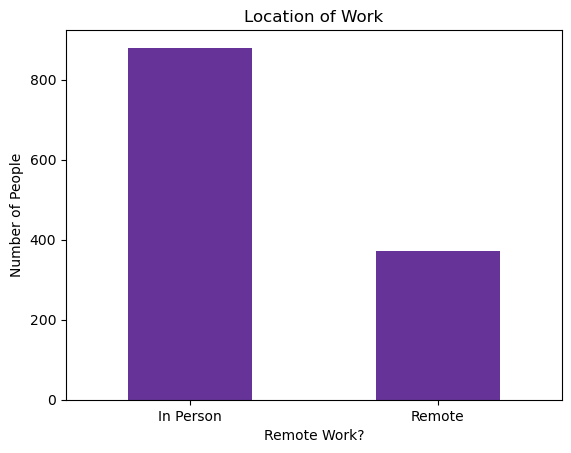

In [200]:
remote = df['remote_work'].value_counts()
remote.plot(kind = 'bar', color = 'rebeccapurple')
plt.xticks(rotation=360) 
plt.title('Location of Work')
plt.xlabel('Remote Work?')
plt.ylabel('Number of People')
plt.xticks([0,1], ['In Person', 'Remote'])
plt.show()


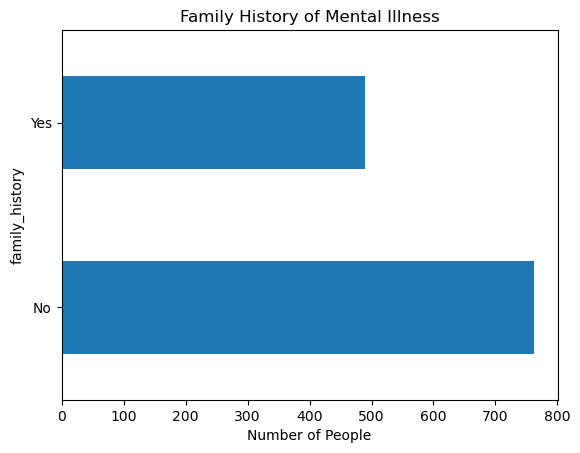

In [209]:

df['family_history'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('Family History of Mental Illness')
plt.xlabel('Number of People')
plt.show()

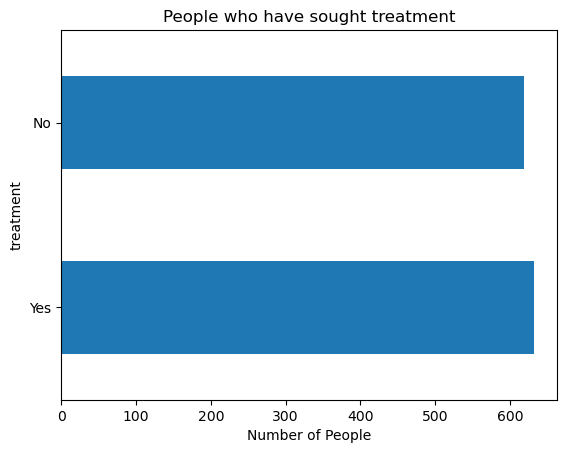

In [208]:

df['treatment'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('People who have sought treatment')
plt.xlabel('Number of People')
plt.show()


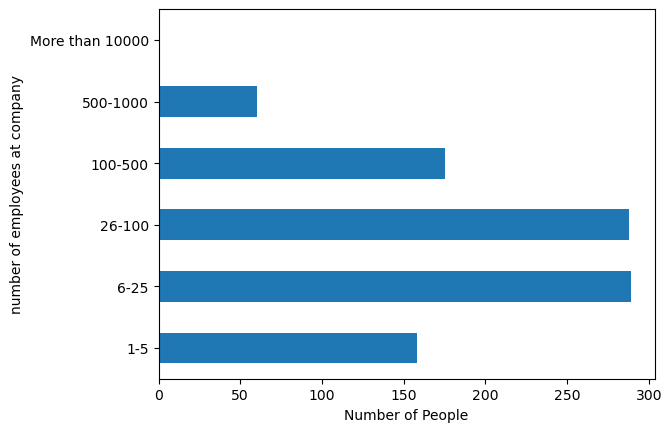

In [213]:
correct_order = ['1-5', '6-25', '26-100', '100-500','500-1000', 'More than 10000']
df['no_employees'].value_counts().reindex(correct_order).plot.barh()

plt.xticks(rotation=360) 
plt.xlabel('Number of People')
plt.ylabel('number of employees at company')
plt.show()

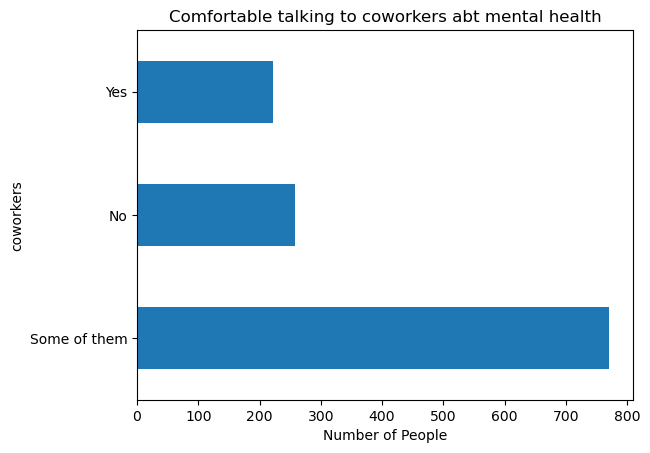

In [227]:
df['coworkers'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('Comfortable talking to coworkers abt mental health')
plt.xlabel('Number of People')
plt.show()

In [ ]:
df['supervisors'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('')
plt.xlabel('Number of People')
plt.show()

Seems like most people work at small sized companies. 
Curious to know whether people from larger companies feel different about mental health


# Select target variable (dependent variable)
y = df['mental_health_consequence']

Encoding data because most of it is categorical/ordinal

Understand the mental health consequence variable with relation to the feature variables

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

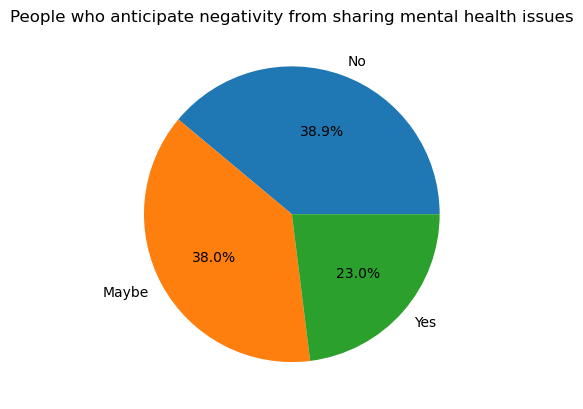

In [215]:
df['mental_health_consequence'].unique()

#Do you think discussing mental health issues with employers could have negative consequences?
value_counts = df['mental_health_consequence'].value_counts()
plt.pie(value_counts, labels=value_counts.index,autopct='%1.1f%%')

plt.title('People who anticipate negativity from sharing mental health issues')
plt.savefig




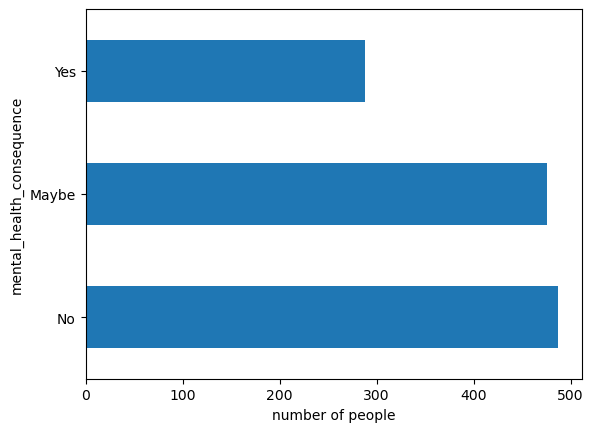

In [218]:
df['mental_health_consequence'].value_counts().plot.barh()
plt.xlabel('number of people')
plt.show()

In [ ]:
ax = df[['family_history','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()

In [138]:
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

    #print the values
for key, value in labelDict.items():     
    print(key, value)

df = df.drop(['Country'], axis= 1)
df.head()


label_Age [5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['Female', 'Male', 'Other']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']
label_self_employed ['No', 'Yes', nan]
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes', nan]
la

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,22,0,2,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,29,1,2,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,17,1,2,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,16,1,2,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,16,1,2,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


ValueError: could not convert string to float: '2014-08-27 11:29:31'